# Análisis de Ventas de Videojuegos

## Introducción

En el competitivo mundo de los videojuegos, comprender qué factores contribuyen al éxito o fracaso de un título es fundamental para desarrolladores y publicadores. Ice, una tienda online que vende videojuegos globalmente, desea identificar patrones en las ventas que le permitan planificar campañas publicitarias más efectivas y detectar proyectos prometedores. El análisis se basa en datos históricos hasta 2016, evaluando aspectos como las plataformas, géneros, reseñas de usuarios y críticos, y clasificaciones ESRB. Este proyecto busca proporcionar insights valiosos para tomar decisiones informadas de cara al 2017.

## Objetivo

El objetivo de este proyecto es analizar los datos históricos de ventas de videojuegos para identificar los patrones clave que determinan el éxito comercial de un título. Este análisis permitirá a Ice optimizar sus estrategias de marketing, seleccionando proyectos con mayor potencial y ajustando sus campañas publicitarias según las características del mercado.

## Etapas de Análisis

1. **Limpieza de Datos**:
    - Convertir los nombres de las columnas a minúsculas para evitar errores de tipografía.
    - Manejar los valores ausentes imputando datos adecuados o marcando los valores como `unknown`.
    - Realizar análisis exploratorio de datos para identificar tendencias iniciales y detectar posibles outliers.
    

2. **Análisis de Ventas**:
    - Evaluar la suma total de ventas por juego y plataforma.
    - Analizar la distribución de lanzamientos de juegos a lo largo de los años y su impacto en las ventas.
    - Identificar las plataformas más rentables y evaluar la duración de su ciclo de vida.
    

3. **Impacto de Reseñas y Críticas**:
    - Investigar cómo las calificaciones de usuarios y críticos afectan las ventas de juegos en diferentes plataformas.
    - Analizar la correlación entre las reseñas y el éxito comercial de un juego.
    

4. **Distribución por Género**:
    - Examinar la distribución de juegos por género y su rentabilidad.
    - Identificar patrones de ventas en géneros populares y de nicho.
    

5. **Análisis Regional**:
    - Determinar las plataformas más populares en Norteamérica, Europa y Japón, y las diferencias en las cuotas de mercado.
    - Evaluar cómo las clasificaciones ESRB afectan las ventas en cada región.
    

6. **Formulación de Hipótesis**:
    - Comparar las calificaciones promedio de usuarios para diferentes plataformas y géneros, y probar la significancia de las diferencias observadas.


7. **Conclusiones**:
    - Resumir los hallazgos clave del análisis, destacando los factores que influyen en el éxito de los videojuegos, y proporcionar recomendaciones estratégicas para futuras campañas publicitarias.
---

## Inicialización

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st

### Cargar datos

In [ ]:
games_data = '/datasets/games.csv'
games_df = pd.read_csv(games_data)

In [ ]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Tenemos un set de datos con nombres, plataformas año de lanzamiento, género, ventas de diferentes regiones, las puntuaciones de los usuarios y de críticos, y su clasificación según el ESRB.

### Estudiar la información general

In [ ]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games_df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


###### comparar promedio y mediana

In [ ]:
# mirar mediana
games_df.median()

Year_of_Release    2007.00
NA_sales              0.08
EU_sales              0.02
JP_sales              0.00
Other_sales           0.01
Critic_Score         71.00
dtype: float64

In [ ]:
# media o promedio
games_df.mean()

Year_of_Release    2006.484616
NA_sales              0.263377
EU_sales              0.145060
JP_sales              0.077617
Other_sales           0.047342
Critic_Score         68.967679
dtype: float64

---

## Limpieza de datos

Convertimos los nombres de las columnas a minúsculas para evitar posibles errores de typo y facilitar al llamar las columnas.

In [ ]:
def lowercase_columns(data):
    data.columns = data.columns.str.lower()
    return data

In [ ]:
lowercase_columns(games_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


---

### Revisar valores duplicados

In [ ]:
games_df.duplicated().sum()

0

No hay duplicados :D

### Cambios de tipo de datos y relleno de datos ausentes

In [ ]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Podemos ver que nos faltan valores, así que determinaremos cuántos valores ausentes hay

In [ ]:
games_df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### `name`

Rellené los valores NaN esta columna por el valor unknown por dos razones:
1. Para que personas fuera del campo puedan entender el conjunto de datos de una mejor manera. A demás de eso, es una variable categórica, así que no modifica mucho al dataset agregar esto.
2. Si lo rellenamos con otro nombre, estamos asegurando algo que no puede ser cierto.

In [ ]:
games_df[games_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
games_df['name'].fillna('unknown', inplace=True)

In [ ]:
games_df[games_df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### `genre`
Rellené los valores NaN esta columna por el valor unclassified por dos razones:
1. Para que personas fuera del campo puedan entender el conjunto de datos de una mejor manera. A demás de eso, es una variable categórica, así que no modifica mucho al dataset agregar esto.
2. Si lo rellenamos con otro género, estamos asegurando algo que no puede ser cierto.

In [ ]:
games_df[games_df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
games_df['genre'].fillna('unclassified', inplace=True)

In [ ]:
games_df[games_df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### `year_of_release`

1. Cambié el tipo de dato de la columna ['year_of_release'] de float64 a int, ya que veo que representa años y no tiene por qué tener valores después del punto decimal.
2. Además de eso, rellené los valores NaN con 0, ya que el año de lanzamiento es una **característica** del juego. Si lo rellenamos con otro año, estamos asegurando algo que no puede ser cierto.

In [ ]:
games_df[games_df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(0).astype('int')

In [ ]:
games_df[games_df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
games_df[games_df['year_of_release'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Estudio valores faltantes `critic_score` y `user_score`

In [ ]:
games_df.shape

(16715, 11)

10% de 16715 = 1671,5 _datos_

In [ ]:
# verificamos cuantos valores nulos hay
games_df['user_score'].isnull().sum()

6701

In [ ]:
games_df['critic_score'].isnull().sum()

8578

Cambio de tipo de dato: tdb -> np.nan

In [ ]:
games_df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [ ]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

In [ ]:
games_df['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: object

In [ ]:
games_df['user_score'] = games_df['user_score'].astype('float')

In [ ]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Gráficos para realizar en análisis de valores atípicos**

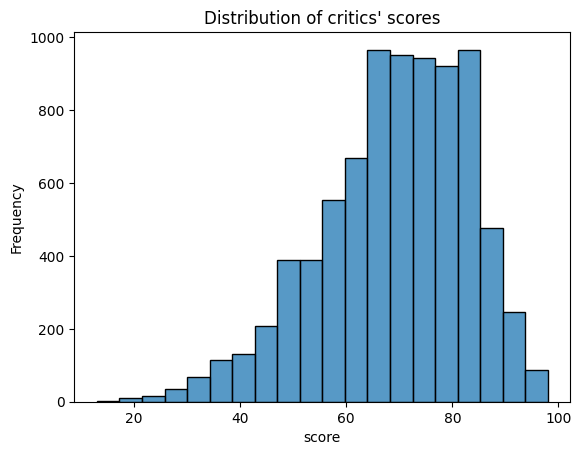

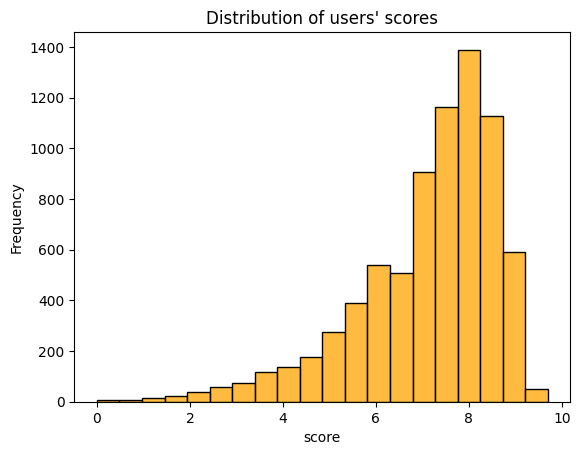

In [ ]:
# calificaciones de los críticos
sns.histplot(data=games_df,
             x='critic_score',
             bins=20
            )

plt.title("Distribution of critics' scores")
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

# calificaciones de los usuarios
sns.histplot(data=games_df,
             x='user_score',
             bins=20,
             color='orange'
            )

plt.title("Distribution of users' scores")
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

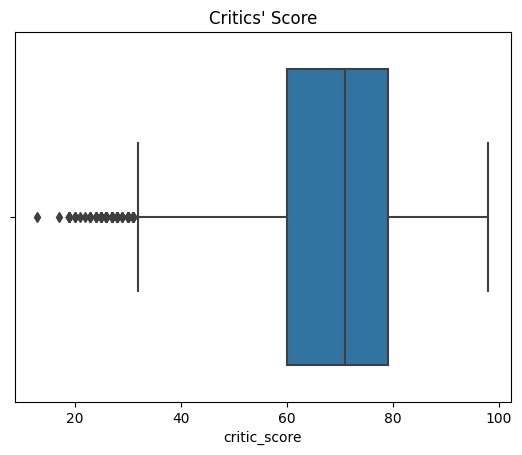

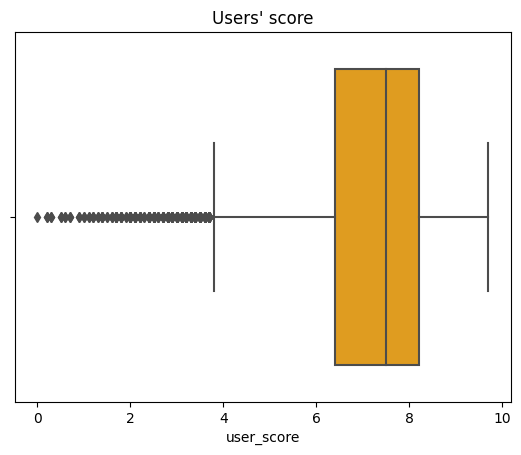

In [ ]:
# calificaciones de los críticos
sns.boxplot(x='critic_score',
            data=games_df
           )
plt.title("Critics' Score")
plt.show()

# calificaciones de los usuarios
sns.boxplot(x='user_score',
            data=games_df,
            color='orange'
           )
plt.title("Users' score")
plt.show()

**Interpretación**:
- Un sesgo a la izquierda sugiere que, en general, los juegos en tu conjunto de datos son bien recibidos tanto por los críticos como por los usuarios.
- Los outliers indican que existe una gran variabilidad en las opiniones sobre ciertos juegos.
- La presencia de muchos outliers podría sugerir que hay factores externos que están influyendo en las calificaciones, como la popularidad de una franquicia o la plataforma en la que se lanzó el juego.

**Justificación para imputar los valores nulos de `critic_score` y `user_score` con la mediana**

Dado que los histogramas y boxplots de las columnas critic_score y user_score muestran una clara distribución sesgada hacia la izquierda y una cantidad significativa de valores atípicos, se ha decidido imputar los valores nulos con la mediana. La mediana, al ser una medida de tendencia central resistente a los outliers, proporciona una estimación más representativa del centro de los datos en este caso. Esta elección permite preservar la forma general de la distribución y mitiga el impacto desproporcionado de los valores extremos en el análisis posterior.

#### `critic_score`

In [ ]:
games_df['critic_score'].fillna(games_df['critic_score'].median(), inplace=True)

#### `user_score`

In [ ]:
games_df['user_score'].fillna(games_df['user_score'].median(), inplace=True)

#### `rating`
Rellené los valores NaN esta columna por el valor unknown por dos razones:
1. Para que personas fuera del campo puedan entender el conjunto de datos de una mejor manera. A demás de eso, es una variable categórica, así que no modifica mucho al dataset agregar esto.
2. Si lo rellenamos con otro tipo de rating, estamos asegurando algo que no puede ser cierto.
3. La columna tiene como tipo de datos `object`, así que es compatible.

In [ ]:
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
games_df[games_df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,71.0,7.5,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,71.0,7.5,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,71.0,7.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,7.5,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,7.5,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.5,NaN


In [ ]:
games_df['rating'].fillna('unknown', inplace=True)

In [ ]:
games_df[games_df['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


---

### Resumen de la Limpieza de datos:
- Convertimos los nombres de las columnas a minúsculas para evitar posibles errores de typo y facilitar al llamar las columnas.
- Habían muchos datos con valores ausentes, se hizo el proceso de imputarlos con 0, otros (categóricos) con la palabra `unknown`, el resto no se les imputó ningún valor ya que en los valores donde no hay valor son caraterísicas únicas del videojuego, así que no me puedo dar la libertad de darle un valor que no lo es.

------

## Análisis

### Suma total ventas totales de `na_sales`, `eu_sales`, `jp_sales` y `other_sales`

In [ ]:
# creamos una columna para guardar las ventas totales por sales
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [ ]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,unknown,31.38


#### Los 5 juegos con mayores ventas

In [ ]:
top_selling_games = games_df.nlargest(5, ['total_sales'])

In [ ]:
top_selling_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.5,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.5,unknown,31.38


#### Las 5 juegos con menores ventas

In [ ]:
lowest_selling_games= games_df.nsmallest(5, ['total_sales'])

In [ ]:
lowest_selling_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.0,0.0,71.0,7.5,unknown,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.0,71.0,7.5,unknown,0.00
15384,Order of War,PC,2009,Strategy,0.00,0.01,0.0,0.0,69.0,7.3,T,0.01
15486,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.0,0.0,71.0,5.8,T,0.01
15499,Motocross Mania 3,XB,2005,Racing,0.01,0.00,0.0,0.0,38.0,3.6,T,0.01


---

#### Conclusión suma total ventas totales de na_sales, eu_sales, jp_sales y other_sales:
Vemos que el juego más popular (más vendido) es **Wii Sports**, su plataforma es Wii y fue lanzado en el año 2006, obteniendo un total en ventas de 82M de dólares.

---

### Cuántos juegos se lanzan cada año - el comportamiento de los juegos

In [ ]:
launch_year_analysis = games_df.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()

In [ ]:
launch_year_analysis = launch_year_analysis[launch_year_analysis['year_of_release'] != 0]

In [ ]:
launch_year_analysis

,year_of_release,name
0,2008,1427
1,2009,1426
2,2010,1255
3,2007,1197
4,2011,1136
5,2006,1006
6,2005,939
7,2002,829
8,2003,775
9,2004,762


#### Gráfico de líneas verticales para ver la cantidad de juegos que se lanzaron por año.

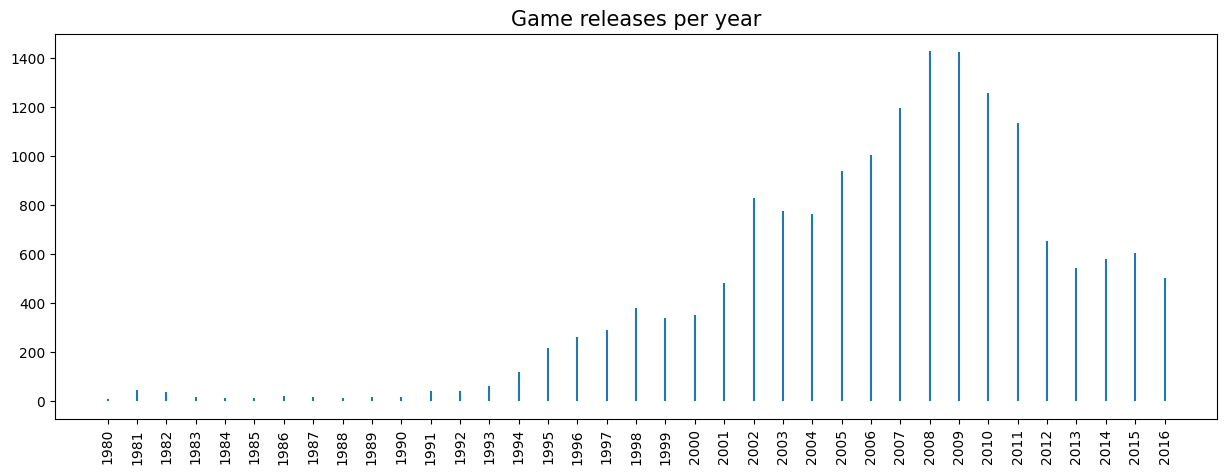

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.vlines(x=launch_year_analysis.year_of_release,
          ymin=0,
          ymax=launch_year_analysis.name)

ax.set_title('Game releases per year', fontsize=15)

"""
y_min = 0
y_max = launch_year_analysis.name.max() + 5  # los valores serán de 5 en 5
ax.set_yticks(range(y_min, y_max, 5))
"""

ax.set_xticks(launch_year_analysis.year_of_release)
ax.set_xticklabels(launch_year_analysis.year_of_release, rotation=90)

plt.show()

#### Conclusión cantidad de juegos que se lanzaron por año:
El año que hubo más ventas de videojuegos fue el 2008, con 1427 juegos en total. Seguido por el año 2009, con 1426 juegos y del año 2010 con 1255.

### Plataforma que genera más ventas - cuál es la plataforma más popular
<span style="color: red;">**¡IMPORTANTE! Este estudio a continuación es un punto de vista general, desde la sección 6.5 se hará el estudio con los años desde el 2013 en adelante.**</span>



In [ ]:
highest_sales_platform = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

In [ ]:
highest_sales_platform

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


#### Conclusión Plataforma que genera más ventas
La Plataforma de videojuegos que ha tenido más popularidad es PS2 con 1255.77 millones recaudados,
seguida por X360 con 971.42M recaudados, y
PS3 con 939.65M recaudados.

### Rentabilidad por plataforma, un paso para las proyecciones

**Z_SCORE**: Que tan alejado estoy de la media - a cuántas desviaciones estándar

In [ ]:
highest_sales_platform['z_score'] = (highest_sales_platform['total_sales'] - highest_sales_platform['total_sales'].mean())/highest_sales_platform['total_sales'].std()

In [ ]:
highest_sales_platform

,platform,total_sales,z_score
0,PS2,1255.77,2.780807
1,X360,971.42,1.964085
2,PS3,939.65,1.872834
3,Wii,907.51,1.780520
4,DS,806.12,1.489304
5,PS,730.86,1.273139
6,GBA,317.85,0.086875
7,PS4,314.14,0.076219
8,PSP,294.05,0.018516
9,PC,259.52,-0.080663


-> Si el valor z_score es menor que 0 será color rojo, y si mayor a 0, verde

In [ ]:
highest_sales_platform['color'] = ['green' if z_sales > 0 else 'red' for z_sales in highest_sales_platform['z_score']]

In [ ]:
highest_sales_platform

,platform,total_sales,z_score,color
0,PS2,1255.77,2.780807,green
1,X360,971.42,1.964085,green
2,PS3,939.65,1.872834,green
3,Wii,907.51,1.780520,green
4,DS,806.12,1.489304,green
5,PS,730.86,1.273139,green
6,GBA,317.85,0.086875,green
7,PS4,314.14,0.076219,green
8,PSP,294.05,0.018516,green
9,PC,259.52,-0.080663,red


#### Gráfico de líneas horizontales de la rentabilidad por plataforma

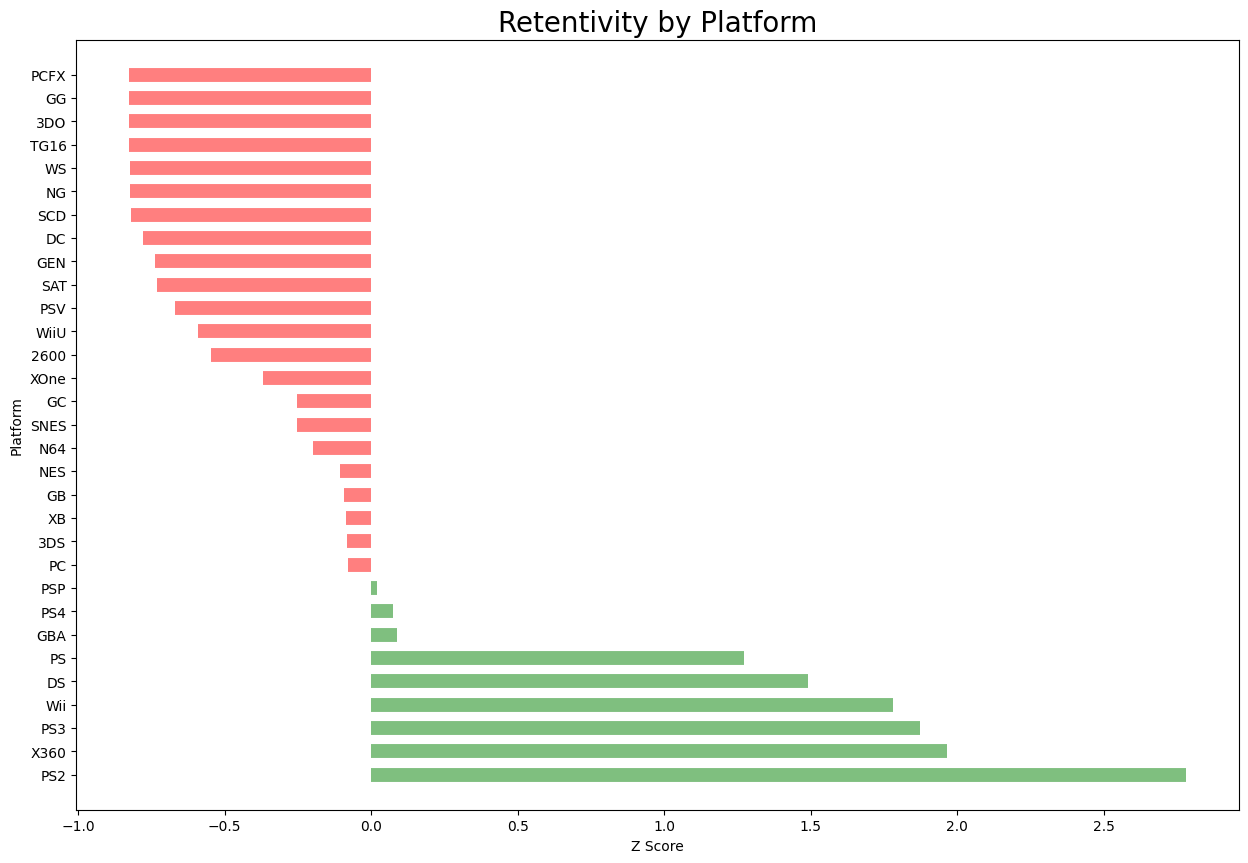

In [ ]:
# figura para visualizar la rentabilidad por plataforma

plt.figure(figsize=(15,10))

plt.hlines(
    y= highest_sales_platform.platform,
    xmin= 0,
    xmax= highest_sales_platform.z_score,
    color= highest_sales_platform.color,
    linewidth= 10,
    alpha= .5
)

plt.ylabel('Platform')
plt.xlabel('Z Score')
plt.title('Retentivity by Platform',
          fontsize=20
         )

plt.show()

---------------------------

### TIEMPO DE VIDA DE CADA PLATAFORMA

In [ ]:
# filtramos los datos relevantes, desde 2013
games_data_clean = games_df.query('year_of_release >= 2013')

In [ ]:
platform_life_time = pd.pivot_table(
    games_data_clean,
    index= 'year_of_release',
    columns= ['platform'],
    values= 'total_sales',
    aggfunc='sum'
).fillna(0)

In [ ]:
platform_life_time

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


#### Gráfico de líneas para ver el tiempo de vida de las plataformas de videojuegos

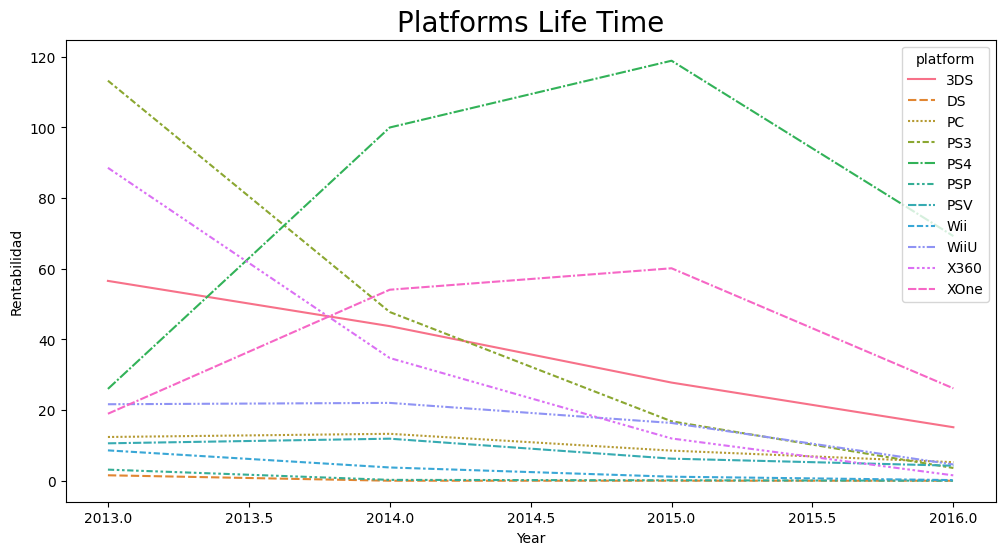

In [ ]:
plt.figure(figsize=(12, 6))

sns.lineplot(
    data = platform_life_time
)

plt.ylabel('Rentabilidad')
plt.xlabel('Year')
plt.title('Platforms Life Time', fontsize=20)

plt.show()

#### Conclusión Tiempo de Vida de las plataformas:

- Hay plataformas que son muy populares en un determinado momento, pero tienen una popularidad de aproximadamente 3 años y luego su popularidad disminuye.
- Las populares actualmente, han tenido unas cuantas decadencias a lo largo de su historia, pero se han recuperado.
- Vemos como la consula Wii, va disminuyendo en rentabilidad, es posible que más adelante disminuya mucho más.
    Para las consolas PlayStation, es posible de que a medida ue salgan más versiones, aumente su rentabilidad.



### Cómo las reseñas de usuarios y críticos afectan las ventas de una plataforma popular
Para analizar cómo las reseñas de usuarios y críticos afectan las ventas de una plataforma popular, primero elegiremos una plataforma popular (por ejemplo, PS2 debido a sus altas ventas) y luego crearemos un gráfico de dispersión para visualizar la relación entre las reseñas y las ventas. También calcularemos la correlación entre estas variables.

In [ ]:
ps2_data = games_df[games_df['platform'] == 'PS2']

#### Gráfico de dispersión para `critic_score` y `total_sales`

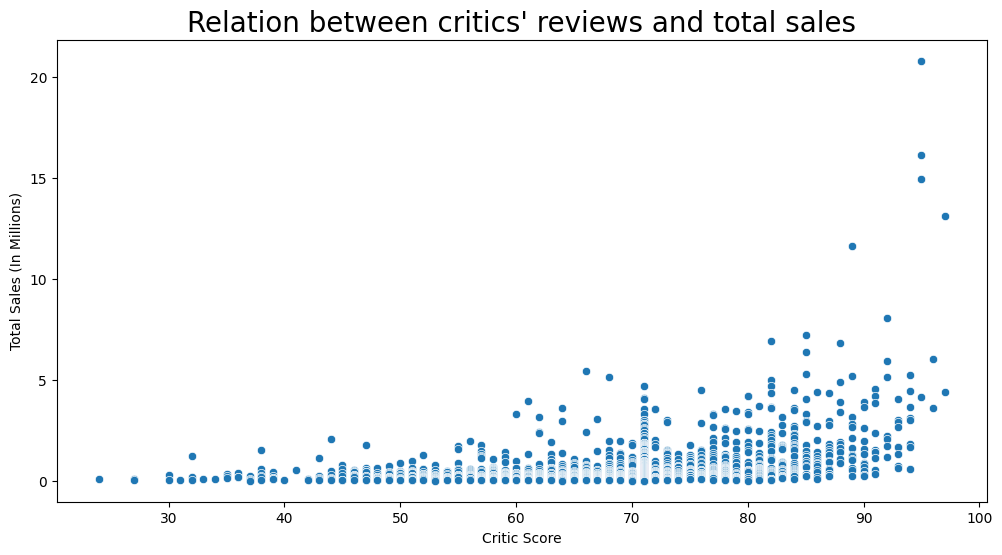

In [ ]:
# gráfico de dispersión para `critic_score` y `total_sales`

plt.figure(figsize=(12,6))
sns.scatterplot(
    data = ps2_data,
    x = 'critic_score',
    y = 'total_sales',
)

plt.title("Relation between critics' reviews and total sales", fontsize=20)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (In Millions)')
plt.show()

Hay una correlación positiva entre estas dos variables. Claramente, el tener una buena puntación de un crítico, aumenta las ventas.

#### Gráfico de dispersión para `user_score` y `total_sales`

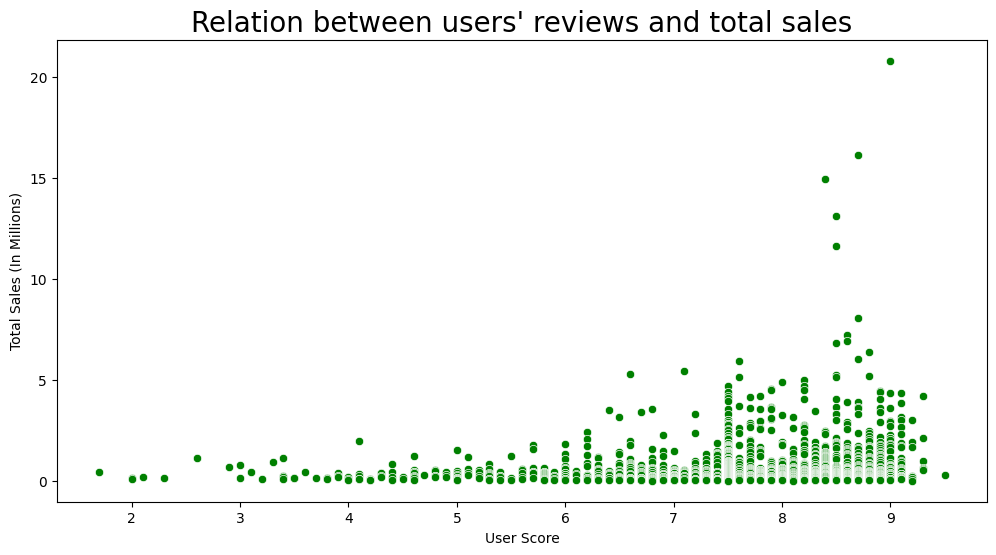

In [ ]:
# gráfico de dispersión para `user_score` y `total_sales`

plt.figure(figsize=(12,6))
sns.scatterplot(
    data = ps2_data,
    x = 'user_score',
    y = 'total_sales',
    color='green'
)

plt.title("Relation between users' reviews and total sales", fontsize=20)
plt.xlabel('User Score')
plt.ylabel('Total Sales (In Millions)')
plt.show()

Hay una correlación positiva, dando a decir que el
tener buenas puntuaciones por parte de los usuarios eleva las ventas.

#### Conclusión para "Cómo las reseñas de usuarios y críticos afectan las ventas de una plataforma popular"
Las calificaciones más altas tienden a estar asociadas con un mayor éxito comercial en la plataforma PS2. Esto sugiere que tanto la opinión de los críticos como la de los usuarios influyen de manera significativa en las decisiones de compra de los consumidores.

### Análisis de la distribución de los juegos por género
Se analizará la distribución de los juegos por género y se determinará cuáles son los más rentables.
Se compararán los géneros con ventas altas y bajas y se sacarán conclusiones.

In [ ]:
genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)#.reset_index()

In [ ]:
genre_sales

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
unclassified       2.42
Name: total_sales, dtype: float64

#### Gráfico de conteo de la distribución de juegos por género

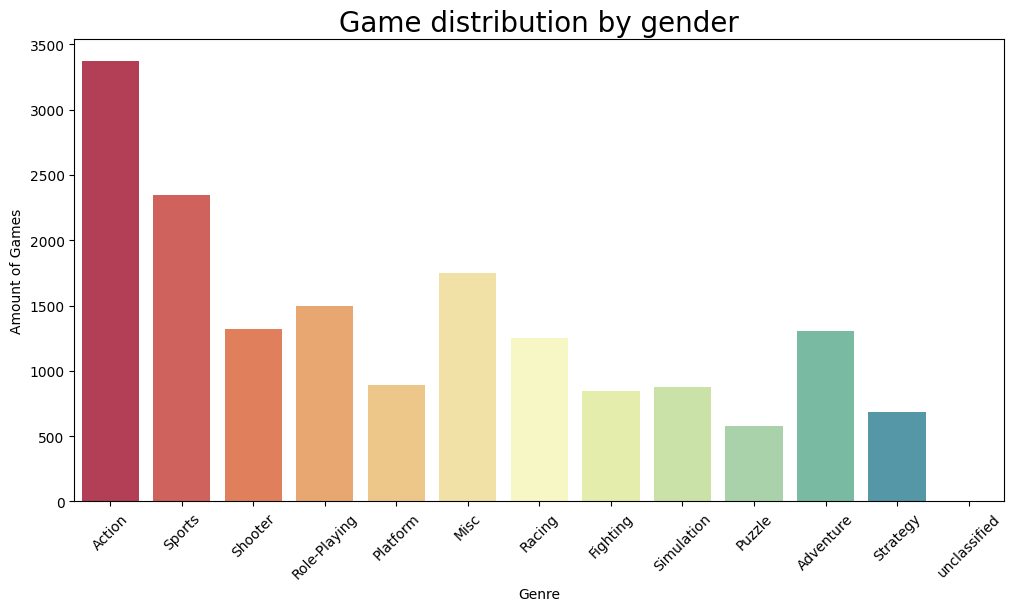

In [ ]:
# distribución de juegos por género

plt.figure(figsize=(12,6))

sns.countplot(
    data= games_df,
    x= 'genre',
    #y= 'total_sales',
    order= genre_sales.index,
    palette= 'Spectral'
)

plt.title('Game distribution by gender', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Amount of Games')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.color_palette.html
#sns.color_palette("Spectral")

#### Gráfico de Barras para visualizar ventas totales por género de videojuego

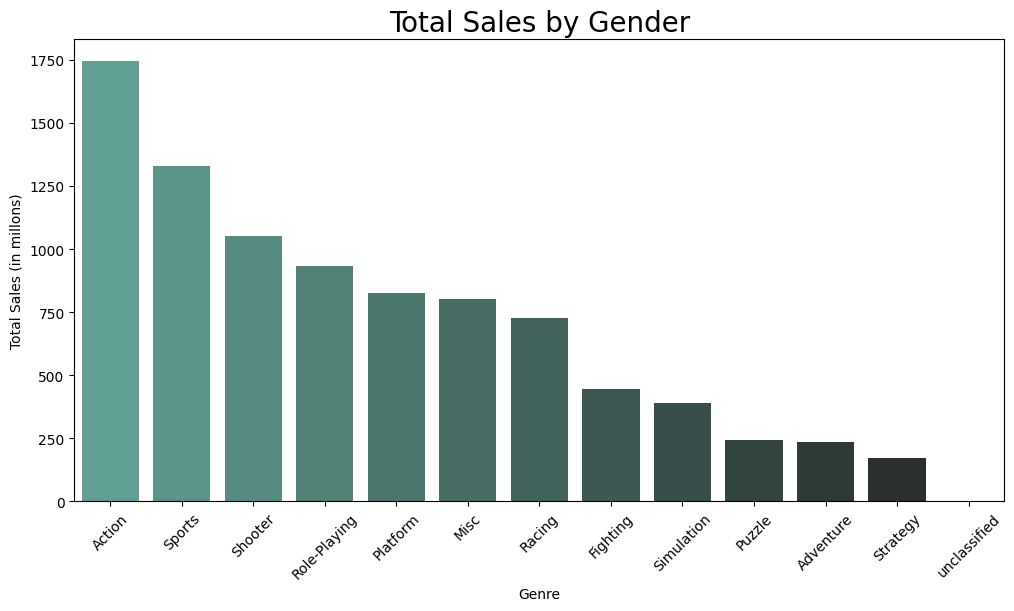

In [ ]:
# ventas totales por género

plt.figure(figsize=(12, 6))

sns.barplot(
    x=genre_sales.index,
    y=genre_sales.values,
    palette="dark:#5A9_r"
)
#sns.color_palette("flare", as_cmap=True)
plt.title('Total Sales by Gender', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millons)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.color_palette.html
#sns.color_palette("dark:#5A9_r")

#### Conclusiones del análisis de la distribución de los juegos por género:
- Action, Sports, y Shooter son los géneros más rentables, lo que podría deberse a su amplio atractivo y a la capacidad de atraer a una gran base de jugadores. Estos géneros a menudo tienen franquicias populares que impulsan las ventas.

- Géneros como Adventure y Strategy tienen las ventas más bajas, lo que podría indicar que son de nicho (que solo pertenece a un sector muy específico de mercado).

#### Resumen general:
- Los géneros con un amplio atractivo y que tienen una gran base de jugadores tienden a ser los más rentables. Por otro lado, los géneros más especializados o de nicho tienden a tener menos ventas, a pesar de que pueden tener muchos lanzamientos. Sin embargo, algunas excepciones pueden ocurrir cuando un título sobresaliente en un género de nicho alcanza gran popularidad.

---

### Crear un usuario para cada región
Se creará un perfil de usuario para cada región (NA, EU, JP), y se determinarán las cinco plataformas principales.

In [ ]:
# Calcular las ventas totales por plataforma en cada región

platform_sales_na = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

In [ ]:
platform_sales_na

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

**Para las ventas en Norte América, vemos que la plataforma que más tuvo ventas fue X360.**
1. X360
2. PS2
3. Wii

In [ ]:
platform_sales_eu

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

**Para las ventas en la Unión Europea, vemos que la plataforma que más tuvo ventas fue PS2**
1. PS2
2. PS3
3. X360

In [ ]:
platform_sales_jp

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

**Para las ventas en Japón, vemos que la plataforma que más tuvo ventas fue DS**
1. DS
2. PS
3. PS2

#### Gráficos para visualizar las cinco plataformas principales en cada región.

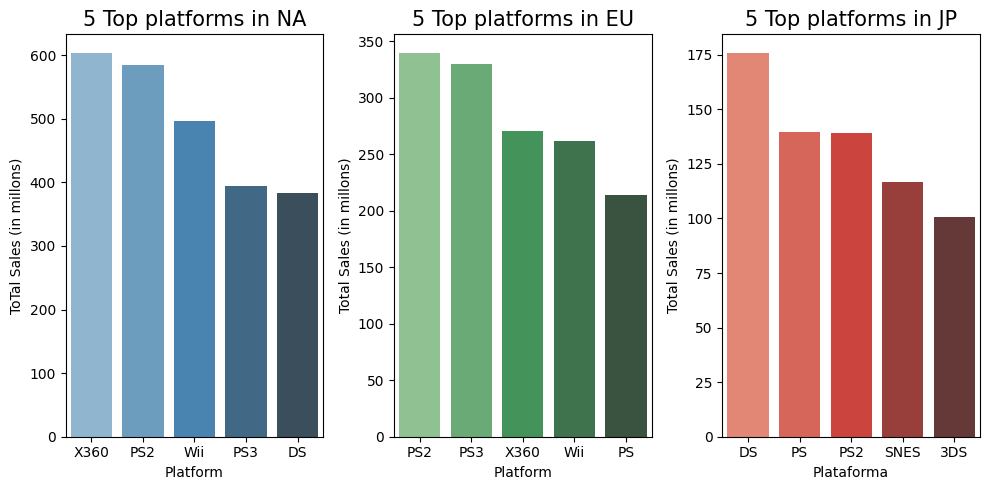

In [ ]:
# identificamos las cinco plataformas principales en cada región.

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.barplot(
    x=platform_sales_na.index,
    y=platform_sales_na.values,
    palette="Blues_d"
)
plt.title('5 Top platforms in NA', fontsize=15)
plt.xlabel('Platform')
plt.ylabel('ToTal Sales (in millons)')

plt.subplot(1, 3, 2)

sns.barplot(
    x=platform_sales_eu.index,
    y=platform_sales_eu.values,
    palette="Greens_d"
)
plt.title('5 Top platforms in EU', fontsize=15)
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millons)')

plt.subplot(1, 3, 3)

sns.barplot(
    x=platform_sales_jp.index,
    y=platform_sales_jp.values,
    palette="Reds_d"
)
plt.title('5 Top platforms in JP', fontsize=15)
plt.xlabel('Plataforma')
plt.ylabel('Total Sales (in millons)')

plt.tight_layout() # se configura al espacio en pantalla
plt.show()

#### Conclusiones para las cinco plataformas principales en cada región:
La popularidad de las plataformas varía significativamente entre regiones
debido a factores culturales, preferencias de los consumidores
y estrategias de marketing regionales. Por ejemplo,
las consolas portátiles pueden ser más populares en Japón,
mientras que las consolas de sobremesa dominan en Norteamérica y Europa.

### Relación entre el Rating y la región
Se determinará si las clasificaciones de ESRB afectan a las ventas en regiones individuales

In [ ]:
# se agruparán las ventas por clasificación ESRB en cada región

esrb_sales_na = games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

In [ ]:
esrb_sales_na

rating
E          1292.99
unknown    1242.46
T           759.75
M           748.48
E10+        353.32
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64

In [ ]:
esrb_sales_eu

rating
E          710.25
unknown    613.83
M          483.97
T          427.03
E10+       188.52
AO           0.61
K-A          0.27
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64

In [ ]:
esrb_sales_jp

rating
unknown    841.96
E          198.11
T          151.40
M           64.24
E10+        40.20
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64

#### Gráficos para comparar las ventas en diferentes regiones según la clasificación ESRB

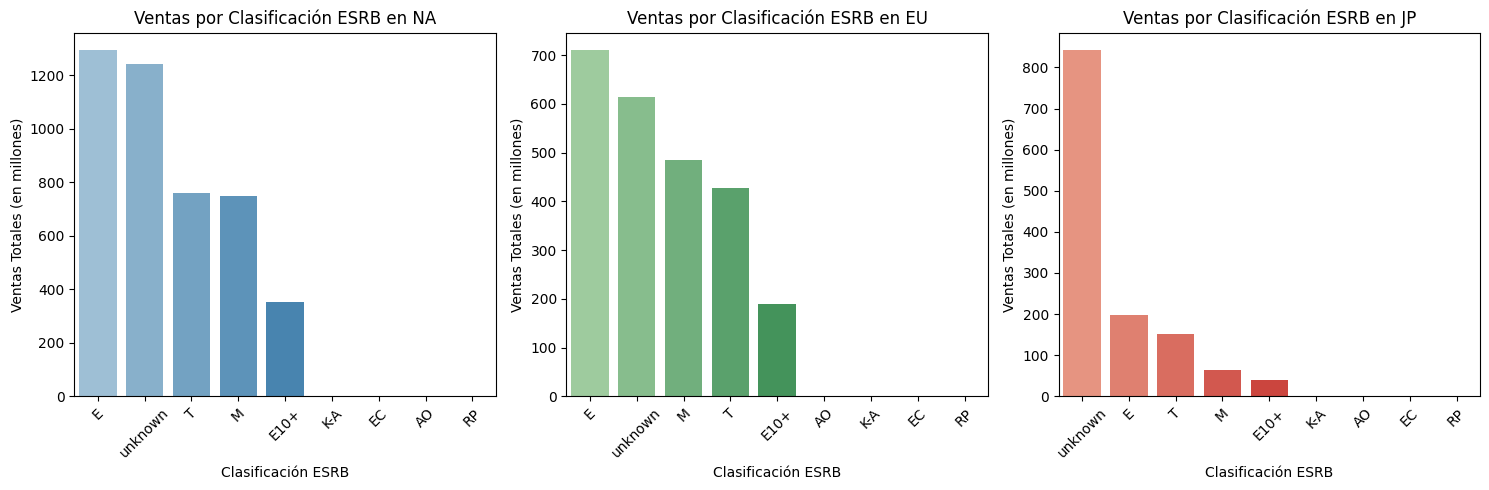

In [ ]:
# comparar las ventas en diferentes regiones según la clasificación ESRB

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=esrb_sales_na.index,
            y=esrb_sales_na.values,
            palette="Blues_d"
           )
plt.title('Ventas por Clasificación ESRB en NA')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x=esrb_sales_eu.index,
            y=esrb_sales_eu.values,
            palette="Greens_d"
           )
plt.title('Ventas por Clasificación ESRB en EU')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x=esrb_sales_jp.index,
            y=esrb_sales_jp.values,
            palette="Reds_d"
           )
plt.title('Ventas por Clasificación ESRB en JP')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

_Nota: Los juego en Japón están clasificados de una manera diferente que en las otra regiones. (CERO)_
- A (Equivalente a Early Childhood, Everyone, and Everyone 10+ en ESRB y 3+ y 7+ en PEGI).
- B (Equivalente a Everyone 10+ y Teen en ESRB y +12 en PEGI).
- C (Equivalente a 16+ en PEGI y a Teen y Mature en ESRB).
- D (Equivalente a Mature en ESRB).
- Z (Equivalente a Mature y Adults Only en ESRB y 18+ en PEGI).

Fuente: https://en.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization

#### Conclusiones para la Relación entre el Rating y la región:
- En NA y EU, la clasificación ESRB parece tener un impacto en las ventas, especialmente con juegos clasificados como E, T y M. Esto sugiere que los consumidores de estas regiones prestan atención a las clasificaciones al decidir qué juegos comprar.
- En Japón, el impacto de la clasificación ESRB puede no ser tan significativo debido a las diferencias culturales y el sistema de clasificación local.

---

## Prueba de las hipótesis

### Formulación de Hipótesis 1:

- **Hipótesis Nula ($H_0$)**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
- **Hipótesis Alternativa ($H_1$)**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son iguales

$$
H_0: (\mu_{XboxOne} = \mu_{PC})
$$
$$
H_1: (\mu_{XboxOne} \neq \mu_{PC})
$$

Estas hipótesis se formulan así porque estamos interesados en saber si hay una diferencia significativa entre las calificaciones promedio de los usuarios para estas dos plataformas. La hipótesis nula siempre establece que no hay diferencia o efecto (igualdad), mientras que la alternativa sugiere lo contrario (diferencia).

Para probar las hipótesis, utilizaré la **prueba t de Student** que se usa para dos pruebas independientes y la prueba de Levene para mostrar si las varianzas son iguales.

#### Criterio de decisión:
- Si el valor p obtenido de la prueba t es **menor que $\alpha$**, **rechazamos la hipótesis nula** ($H_0$), lo que significa que existe _evidencia suficiente para afirmar que las calificaciones promedio son diferentes_.
- Si el valor p es **mayor que $\alpha$**, **no rechazamos la hipótesis nula**, indicando que _no hay evidencia suficiente para concluir que las calificaciones promedio difieren_.



#### Preparamos datos

In [ ]:
alpha = 0.05 # valor sensible

In [ ]:
from scipy.stats import levene

In [ ]:
# sample_1 = user_scores_xbox
# calificación Xbox One
user_scores_xbox = games_df[games_df['platform'] == 'XOne']['user_score'].dropna()

# sample_2 = user_scores_pc
# calificación PC
user_scores_pc = games_df[games_df['platform'] == 'PC']['user_score'].dropna()#+.sort_index(ascending=False)

#### Verificamos las variables con las que contamos

In [ ]:
print("Calificaciones de usuarios para Xbox One:")
user_scores_xbox.head()

Calificaciones de usuarios para Xbox One:


99     7.5
165    7.9
179    5.4
242    6.4
270    6.2
Name: user_score, dtype: float64

In [ ]:
print("Calificaciones de usuarios para PC:")
user_scores_pc.head()

Calificaciones de usuarios para PC:


85     7.6
138    7.3
192    4.0
195    7.5
218    8.2
Name: user_score, dtype: float64

In [ ]:
# prueba de levene para igualdad de varianzas
stat, p_value_levene = levene(user_scores_xbox, user_scores_pc)
print(f'Estadístico de Levene: {stat}, \nvalor p: {p_value_levene}')

Estadístico de Levene: 7.777487276480662e-05, 
valor p: 0.9929649852182456


In [ ]:
if p_value_levene > alpha:
    print('No se puede rechazar la hipótesis nula de Levene. Las varianzas son iguales')
    equal_var = True
else:
    print('Se puede rechazar la hipótesis nula de Levene. Las varianzas NO son iguales.')
    equal_var = False

No se puede rechazar la hipótesis nula de Levene. Las varianzas son iguales


In [ ]:
results = st.ttest_ind(user_scores_xbox, user_scores_pc, equal_var=equal_var)

p_value_ttest = results.pvalue

print(f'El valor del valor p de la prueba t es: {p_value}')

El valor del valor p de la prueba t es: 0.00010123955107193582


In [ ]:
if p_value_ttest < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")

Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


#### Conclusión Hipótesis 1:
- Calificaciones promedio de usuarios para Xbox One y PC: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son significativamente diferentes. Esto indica que, en general, los usuarios valoran de manera distinta los juegos en estas dos plataformas.

### Formulación Hipótesis 2:

- **Hipótesis Nula ($H_0$)**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
- **Hipótesis Alternativa ($H_1$)**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

$$
H_0: (\mu_{Acción} = \mu_{Deportes})
$$
$$
H_1: (\mu_{Acción} \neq \mu_{Deportes})
$$

#### Criterio de decisión:
- Si el valor p es menor que $\alpha$, se rechaza la hipótesis nula, lo que indicaría que las calificaciones promedio de los géneros de Acción y Deportes son diferentes.
- Si el valor p es mayor que $\alpha$, no se rechaza la hipótesis nula, lo que indicaría que no hay suficiente evidencia para concluir que las calificaciones promedio son diferentes.

Utilizaremos la prueba t de Student y la prueba de Levene para mostrar si las varianzas son iguales, todo para comparar las calificaciones promedio entre los géneros de Acción y Deportes.

In [ ]:
alpha = 0.05 # valor sensible

In [ ]:
# sample_1 = user_scores_Action
# calificación Xbox One
user_scores_Action = games_df[games_df['genre'] == 'Action']['user_score'].dropna()

# sample_2 = user_scores_Sports
# calificación PC
user_scores_Sports = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

In [ ]:
user_scores_Action

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16692    7.6
16694    7.5
16695    7.5
16699    7.5
16710    7.5
Name: user_score, Length: 3369, dtype: float64

In [ ]:
user_scores_Sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16676    7.5
16688    7.5
16693    7.5
16700    7.5
16711    7.5
Name: user_score, Length: 2348, dtype: float64

In [ ]:
# prueba levene para verificar la igualdad entre varianzas
levene_result = st.levene(user_scores_Action, user_scores_Sports)
p_value_levene = levene_result.pvalue
print(f'Valor p de la prueba de Levene: {p_value_levene}')

Valor p de la prueba de Levene: 0.6828105166182066


In [ ]:
# decidimos si asumimos igualdad de varianzas basado en el valor p de Levene
if p_value_levene > alpha:
    equal_var = True
    print("No rechazamos la hipótesis nula de igualdad de varianzas (equal_var=True).")
else:
    equal_var = False
    print("Rechazamos la hipótesis nula de igualdad de varianzas (equal_var=False).")

No rechazamos la hipótesis nula de igualdad de varianzas (equal_var=True).


In [ ]:
# Realizamos la prueba t para comparar las calificaciones promedio
ttest_result = st.ttest_ind(user_scores_Action, user_scores_Sports, equal_var=equal_var)
p_value_ttest = ttest_result.pvalue

print(f'El valor del valor p es: {p_value_ttest}')

El valor del valor p es: 0.7131417795320426


In [ ]:
if p_value_ttest < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.")

No rechazamos la hipótesis nula: No hay suficiente evidencia para decir que las calificaciones promedio son diferentes.


#### Conclusión Hipótesis 2:
- Calificaciones promedio de usuarios para los géneros de Acción y Deportes: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes también son significativamente diferentes. Esto sugiere que los usuarios tienen una percepción distinta sobre la calidad o el disfrute de los juegos en estos géneros.

### Conclusión general hipótesis 1 y 2:
Las calificaciones promedio de los usuarios varían significativamente según la plataforma y el género de los juegos. Esto puede reflejar diferentes expectativas, experiencias de usuario, o preferencias en cuanto al tipo de juegos y la plataforma en la que se juega. Estas diferencias podrían ser importantes para los desarrolladores y publicadores de videojuegos al considerar cómo optimizar la satisfacción del usuario en distintas plataformas y géneros.

---

## Conclusión final

A lo largo de este análisis se exploraron muchos factores que pueden influir al éxito de un videojuego, desde su popularidad, cuántos juego se sacan cada año, qué géneros son más populares, las reseñas de los críticos y los usuarios y así como las calificaciones ESRB.

Los datos muestran que la popularidad de las plataformas puede variar considerablemente entre regiones debido a factores culturales y de marketing, lo que indica la necesidad de diferentes enfoques por parte del equipo de marketing.

Las reseñas de usuarios y críticos también es muy importante en el desempeño comercial de los juegos, especialmente en plataformas como la PS2, donde una alta calificación se correlaciona directamente con mayores ventas. Esto indica la cuán importante es mantener una alta calidad y satisfacer las expectativas del consumidor y estar al pendiente de sus reseñas y comentarios. También remarcando la necesidad de las encuestas de satisfacción.

Asimismo, los géneros más populares, como Acción y Shooter, tienden a dominar las ventas, a diferencia con géneros de nicho como Aventura y Estrategia, que, aunque menos rentables, pueden encontrar éxito en mercados específicos.

Finalmente, la comparación de calificaciones de usuarios para distintos géneros y plataformas revela que estas varían significativamente, lo que refuerza la idea de que no existe un enfoque único que garantice el éxito en todas las áreas. Para los desarrolladores y publicadores, esto significa que deben considerar cuidadosamente las características de su público objetivo y ajustar sus estrategias de desarrollo y marketing en consecuencia.